In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## This File perform the linear regression using Stat model

In [3]:
# read the dataset
advertising=pd.read_csv("F:\ML\python_concepts\python_concepts_by_upgrade\Module_3\LinearRegression/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


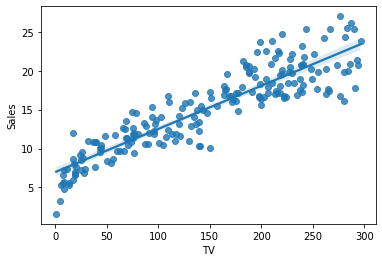

In [7]:
# visulalize the data for TV 
sns.regplot(x='TV', y='Sales', data=advertising)
# regplot represent the regression plot

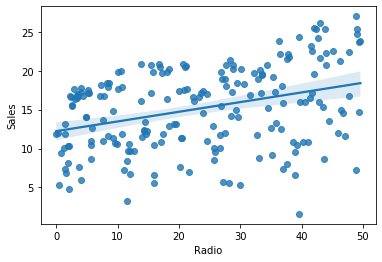

In [8]:
# visulalize the data for Radio
sns.regplot(x='Radio', y='Sales', data=advertising)

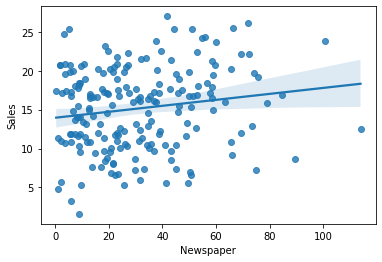

In [9]:
# visulalize the data for NewsPaper
sns.regplot(x='Newspaper', y='Sales', data=advertising)

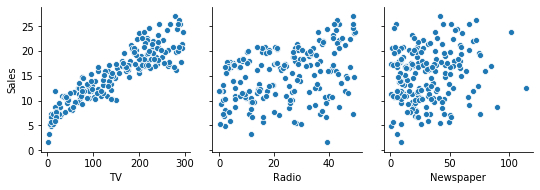

In [10]:
# we can see TV plot is better than the other two parameters
# so to compare all in a single plot we can use pair plot

sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

In [11]:
# Another way to check the heat map with correlation between variables

advertising.corr()
# we can see the correlation bw tv and sale is very high near 0.9


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


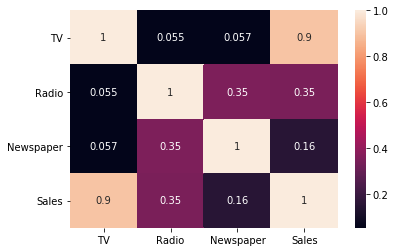

In [12]:
sns.heatmap(advertising.corr(), annot=True)

## simple linear regression model on TV and Sale

## steps for model building using sklearn

1. Create an object of linear regression 

2. Fit the model

3. see the parameters, and make prediction (train, test)

4. Evaluate the model (r2, etc)


In [13]:
# first lets create x and y

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
# X is capital due to here we can have more than one attribute 

X = advertising['TV']
y = advertising['Sales']

In [15]:
# train-test split (70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)


In [16]:
# if we check the shape
X_train.shape

# it is 140 bcoz the whole data contain 200 rows and 70% is 140.
X_test.shape
# it is 60 bcoz the whole data contain 200 rows and 30% is 60.


(60,)

In [17]:

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [36]:
# the shape of X_train is (140, ) and the fit model expect at least (140,1)
# so reshaping is required (put -1 for n no of rows)
X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape
# similarly for X_test
X_test_lm = X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [37]:
# Step 1 is to create an object for the model 

lm= LinearRegression()

# Step2 is to fit the model on X_train and y_train
lm.fit(X_train_lm, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Step 3 see the params and make predictions
# for help 
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      sub

In [39]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [ ]:
# as we can see both are same as in the stat model

In [40]:
# make prediction

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [41]:
# step 4 evaluate the model
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
